In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Load a dataset from a CSV file
tortilla_prices_path = (r'/Users/zan/Tortillas-Project/Tortillas-Project/tortilla_prices.csv')

In [4]:
tortilla_df = pd.read_csv(tortilla_prices_path)

In [5]:
# Check for missing values
print(tortilla_df.isnull().sum())

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64


In [6]:
tortilla_df.count()

State                 284394
City                  284394
Year                  284394
Month                 284394
Day                   284394
Store type            284394
Price per kilogram    278004
dtype: int64

In [7]:
# Drop missing values
tortilla_df = tortilla_df.dropna(how='any')

In [8]:
tortilla_df.count()

State                 278004
City                  278004
Year                  278004
Month                 278004
Day                   278004
Store type            278004
Price per kilogram    278004
dtype: int64

In [9]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278004 non-null  object 
 1   City                278004 non-null  object 
 2   Year                278004 non-null  int64  
 3   Month               278004 non-null  int64  
 4   Day                 278004 non-null  int64  
 5   Store type          278004 non-null  object 
 6   Price per kilogram  278004 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 17.0+ MB


In [10]:
tortilla_df=tortilla_df[~tortilla_df["Year"].isna()]

In [11]:
tortilla_df[["Year","Month","Day"]]=tortilla_df[["Year","Month","Day"]].astype(int)

In [12]:
# Create a new 'date' column with the concatenated date 

tortilla_df['Date'] = tortilla_df['Month'].astype(str).str.zfill(2) + '/' + tortilla_df['Day'].astype(str).str.zfill(2) + '/' + tortilla_df['Year'].astype(str)

In [13]:
tortilla_df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9,01/10/2007
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0,01/10/2007
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0,01/10/2007
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0,01/10/2007
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.0,01/10/2007


In [14]:
tortilla_df["Date"]=pd.to_datetime(tortilla_df["Date"])

In [15]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               278004 non-null  object        
 1   City                278004 non-null  object        
 2   Year                278004 non-null  int64         
 3   Month               278004 non-null  int64         
 4   Day                 278004 non-null  int64         
 5   Store type          278004 non-null  object        
 6   Price per kilogram  278004 non-null  float64       
 7   Date                278004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 19.1+ MB


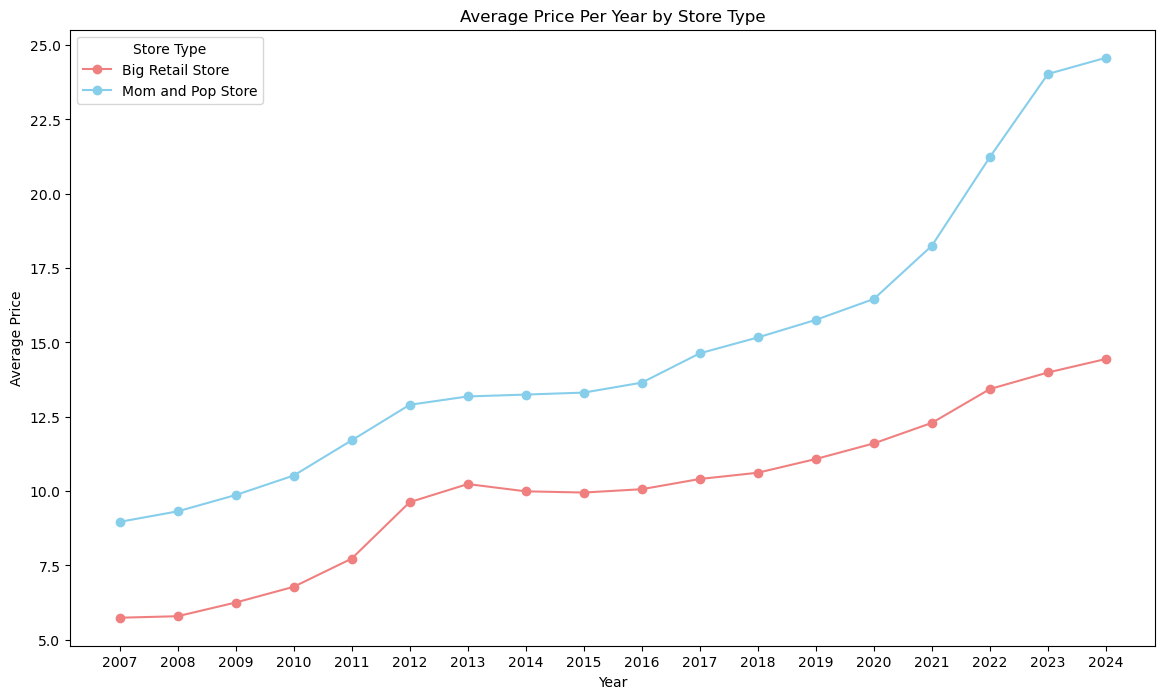

In [46]:
#Average price per year for mom & pop stores versus big retailers
average_price_per_year = tortilla_df.groupby(['Year','Store type'])['Price per kilogram'].mean().reset_index()

plt.figure(figsize=(14, 8))

colors = {'Mom and Pop Store': 'skyblue', 'Big Retail Store': 'lightcoral'}

for store_type in average_price_per_year['Store type'].unique():
    curve = average_price_per_year[average_price_per_year['Store type'] == store_type]
    plt.plot(curve['Year'], curve['Price per kilogram'], marker='o', color=colors[store_type], linestyle='-', label=store_type)

plt.title('Average Price Per Year by Store Type')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(average_price_per_year['Year'].unique())
plt.legend(title='Store Type')
plt.show()


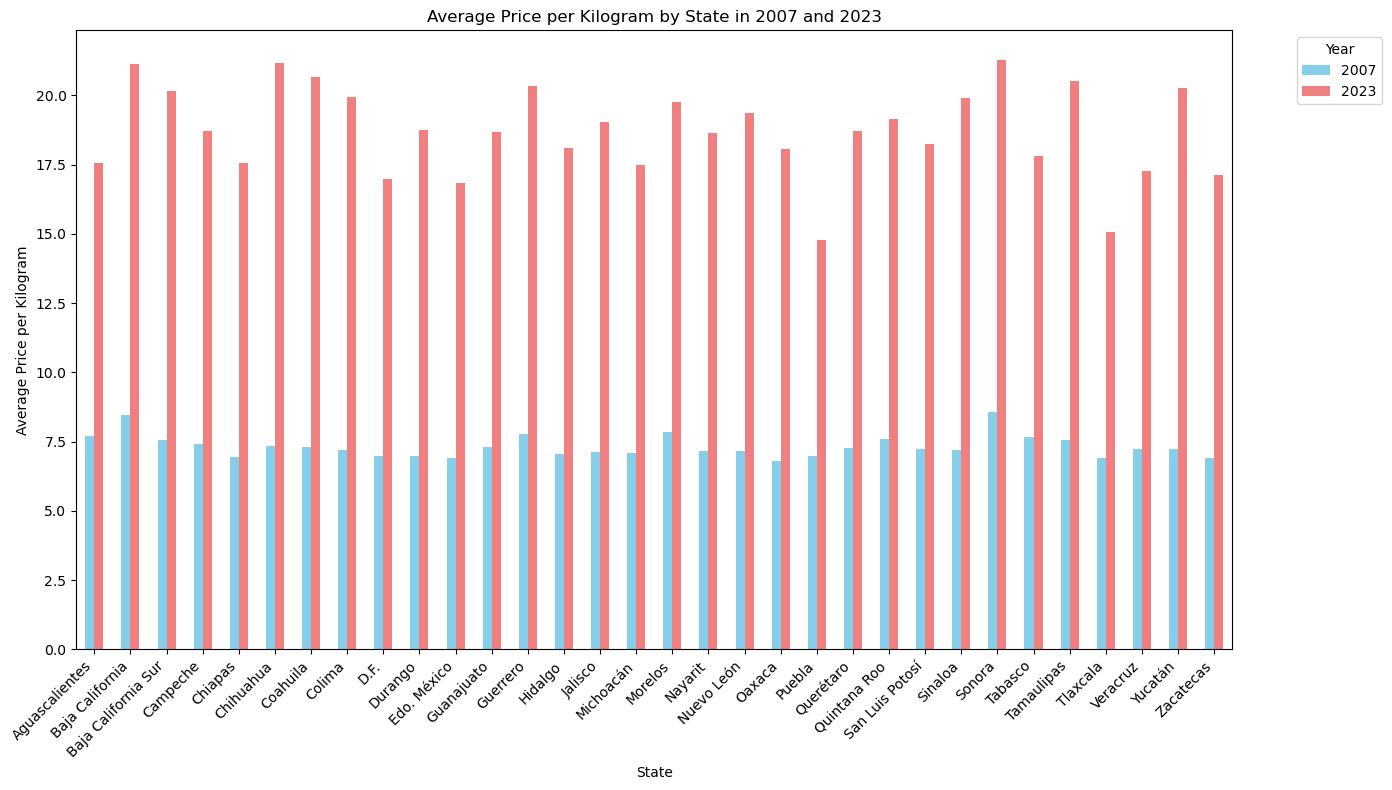

In [45]:
df = pd.read_csv('tortilla_prices.csv')
selected_years = [2007, 2023]
filtered_df = df[df['Year'].isin(selected_years)]
average_prices = filtered_df.groupby(['State', 'Year'])['Price per kilogram'].mean().unstack()
average_prices.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightcoral']) 
plt.title('Average Price per Kilogram by State in 2007 and 2023')
plt.xlabel('State')
plt.ylabel('Average Price per Kilogram')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()